In [6]:
# TS. Nguyễn Hồng Quang
# Viện CNTT-TT
# Trường ĐHBKHN
# Ngày 22 tháng 10 năm 2021
# Bài tập 1.16 
import numpy as np
import matplotlib.pyplot as plt
import math
#import mpmath
#from mpmath import mp

In [7]:
f0 = 1/50
L = 64
N = 200

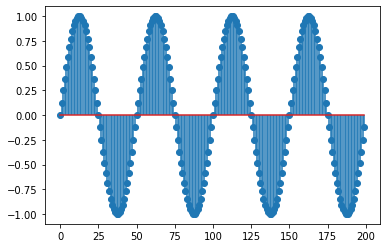

In [8]:
n = np.arange(N)
xn = np.sin(2 * math.pi * f0 * n)
#xn = [mpmath.sin(2 * math.pi * f0 * n1) for n1 in n ]
#plt.plot(n, xn)
plt.stem(n, xn)
plt.show()

In [109]:
def quantization(xn, L):
    xqn_truncation = []
    xqn_rounding = []
    min = -1
    delta = 2.0 / L
    print("delta: ", delta)
    for sample in xn: 
        low_level = int((sample - min) / delta ) * delta + min
        high_level = int((sample - min) / delta ) * delta + min + delta
        #print(sample , low_level, high_level)
        
        if sample < low_level or sample > high_level: print("ERROR")
        
        # Truncation 
        #if sample > 0: xqn_truncation.append(low_level)
        #else: xqn_truncation.append(high_level)
        xqn_truncation.append(low_level)
        
        # Rounding 
        if abs(sample - low_level) > abs(sample - high_level):
            xqn_rounding.append(high_level)
        else:
            xqn_rounding.append(low_level)
        
    return xqn_truncation, xqn_rounding  

xqn_truncation, xqn_rounding = quantization(xn, 64)

delta:  0.03125


In [110]:
def power_signal(signal): 
    P = 0
    for sample in signal: 
        P += sample * sample     
    P = P / len(signal)
    return P


print("Px: ", power_signal(xn))

Px:  0.5000000000000007


In [111]:
def SQNR(Px, Pe):
    return 10 * math.log10(Px/Pe)

def quantization_summary(xn, L):
    print("Number of levels: ", L)
    print("Number of bits: ", math.log2(L))

    xqn_truncation, xqn_rounding = quantization(xn, L)
    eq_truncation = []
    for i in range(N):
        eq_truncation.append(xqn_truncation[i] - xn[i])

    print("\nPe truncation: ", power_signal(eq_truncation))
    print("SQNR trunction: ", SQNR(power_signal(xn), power_signal(eq_truncation)))

    eq_rounding = []
    for i in range(N):
        eq_rounding.append(xqn_rounding[i] - xn[i])

    print("\nPe rounding: ", power_signal(eq_rounding))
    print("SQNR rounding: ", SQNR(power_signal(xn), power_signal(eq_rounding)))
    print("\nSQNR in theory: ", 1.76 + 6.02 * math.log2(L))

quantization_summary(xn, 64)

Number of levels:  64
Number of bits:  6.0
delta:  0.03125

Pe truncation:  0.00036775405428018866
SQNR trunction:  31.334125350593386

Pe rounding:  6.008475040794629e-05
SQNR rounding:  39.20205742883175

SQNR in theory:  37.879999999999995


In [107]:
quantization_summary(xn, 128)

Number of levels:  128
Number of bits:  7.0
delta:  0.015625

Pe truncation:  9.18490898440675e-5
SQNR trunction:  37.35895147207068

Pe rounding:  1.11242545335263e-5
SQNR rounding:  46.52699086959317

SQNR in theory:  43.9


In [98]:
quantization_summary(xn, 256)

Number of levels:  256
Number of bits:  8.0
delta:  0.0078125

Pe truncation:  2.096909406379687e-05
SQNR trunction:  43.773903364645186

Pe rounding:  3.6121447852282896e-06
SQNR rounding:  51.412048545645696

SQNR in theory:  49.919999999999995


In [99]:
print(N)

200
